In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#standardize data
from sklearn.preprocessing import StandardScaler

#PCA
from sklearn.decomposition import PCA

#choosing number of clusters
from yellowbrick.cluster import kelbow_visualizer
from yellowbrick.cluster import KElbowVisualizer

#clustering
from sklearn.cluster import KMeans

#silhouette visualizer
from yellowbrick.cluster import silhouette_visualizer

import warnings
warnings.filterwarnings('ignore')

**Load data**

In [2]:
df = pd.read_excel("/kaggle/input/segmentation/CC_data.xlsx",index_col='Customer Key')

**Print column names**

In [3]:
print(df.columns.to_list())

['Sl_No', 'Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']


**Read data**

In [4]:
df.head()

,Sl_No,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Customer Key,,,,,,
87073,1,100000,2,1,1,0
38414,2,50000,3,0,10,9
17341,3,50000,7,1,3,4
40496,4,30000,5,1,1,4
47437,5,100000,6,0,12,3


In [5]:
df.tail()

,Sl_No,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Customer Key,,,,,,
51108,656,99000,10,1,10,0
60732,657,84000,10,1,13,2
53834,658,145000,8,1,9,1
80655,659,172000,10,1,15,0
80150,660,167000,9,0,12,2


In [6]:
print(df.nunique())
print(df.shape)

Sl_No                  655
Avg_Credit_Limit       109
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64
(655, 6)


**Create a copy of dataset**

In [7]:
dfCopy = df.copy()

**Dropping SL_No:we do not need it**

In [8]:
df = df.drop(columns=['Sl_No'])

**Confirming S1_No was dropped**

In [9]:
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Customer Key,,,,,
87073,100000,2,1,1,0
38414,50000,3,0,10,9
17341,50000,7,1,3,4
40496,30000,5,1,1,4
47437,100000,6,0,12,3


**Standardization**

In [10]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

**PCA**

In [11]:
pca = PCA()                     #Instantiating
pca.fit(df_scaled)              #fitting pca

PCA()

In [12]:
pca.explained_variance_ratio_   #Explained variance by each component

array([0.45753002, 0.37439925, 0.06384537, 0.05558608, 0.04863928])

**Visualization:cumulative variance**

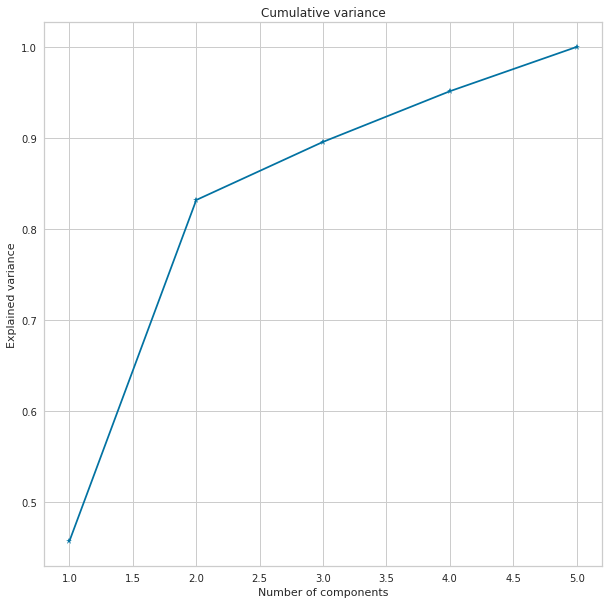

In [13]:
plt.figure(figsize=(10,10))
plt.plot(np.arange(1,6,1),pca.explained_variance_ratio_.cumsum(),'b-*')
plt.title('Cumulative variance')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

**Visualization:Explained variance by each component**

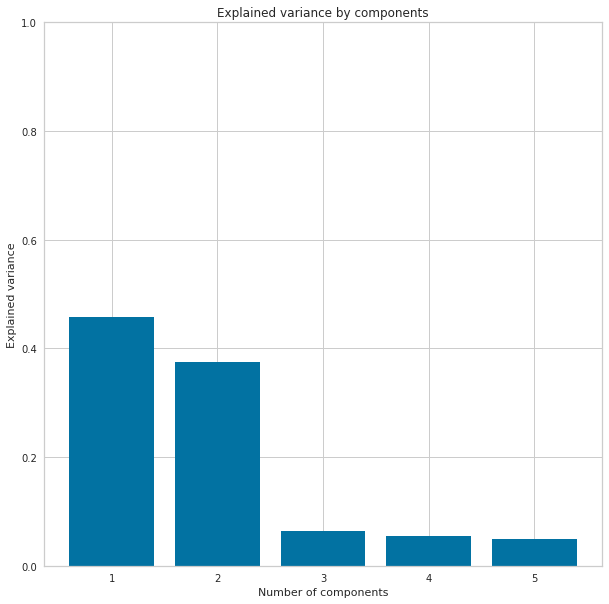

In [14]:
plt.figure(figsize=(10,10))
plt.bar(np.arange(1,6,1),pca.explained_variance_ratio_)
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.ylim([0,1])
plt.show()

**Proceed with 2 components :cumulative sum more than 80%**

In [15]:
pca = PCA(n_components=2)
pca.fit(df_scaled)

df_PCA = pca.transform(df_scaled)

**Kmeans on PCA object**

**Determine optimal clusters:Elbow method**

**Elbow plot**

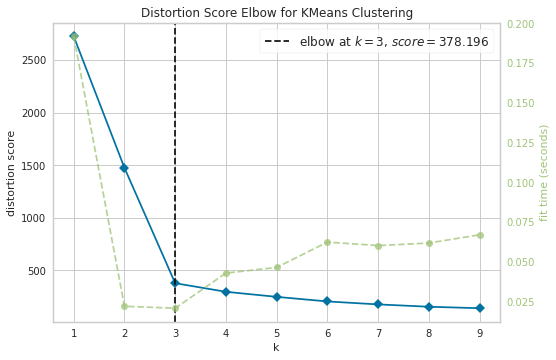

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
kmeans = KMeans()                       #instantiate kmeans
elbowPlot = KElbowVisualizer(kmeans,k=(1,10))   #instantiate visualizer
elbowPlot.fit(df_PCA)                #Fit visualizer to data
elbowPlot.show()                     #select k=3

**Quicker elbow plot**

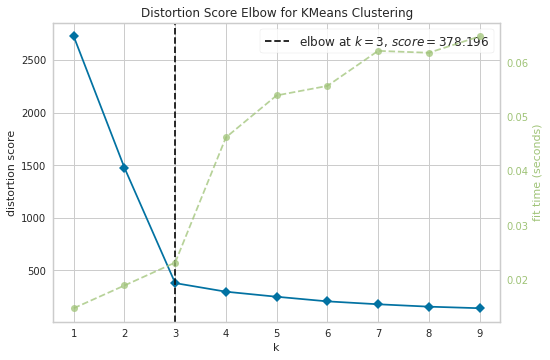

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, random_state=1), k=(1, 10))

In [17]:
kelbow_visualizer(KMeans(random_state=1,init='k-means++'),df_PCA,k=(1,10))

**KMeans using three clusters on PCA object**

In [18]:
kmeans_PCA = KMeans(n_clusters=3,random_state=1,init='k-means++').fit(df_PCA)

**Silhouette Visualizer**

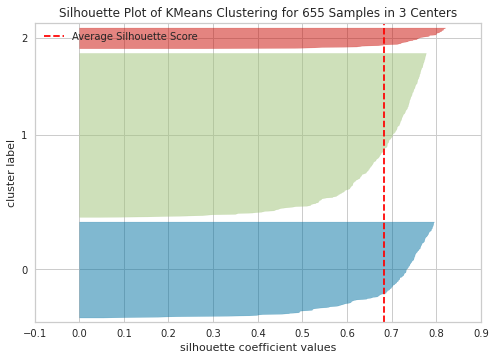

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 655 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=1))

In [19]:
silhouette_visualizer(kmeans_PCA,df_PCA, colors='yellowbrick')

**Creating a dataframe of original df,kmeans and principal components**

In [20]:
kmeans_df = pd.concat([dfCopy.reset_index(drop=True),pd.DataFrame(df_PCA)],axis=1)

**Naming PCA columns**

In [21]:
kmeans_df.columns.values[-2:] =['Component_1','Component_2']

In [22]:
kmeans_df.head()

,Sl_No,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Component_1,Component_2
0,1,100000,2,1,1,0,0.519621,0.530952
1,2,50000,3,0,10,9,-1.454627,3.101185
2,3,50000,7,1,3,4,0.536173,0.829705
3,4,30000,5,1,1,4,-0.351871,0.127754
4,5,100000,6,0,12,3,1.272876,3.677893


**Adding column of labels in kmeans_df**

In [23]:
kmeans_df['kmeansClusterLabels'] = kmeans_PCA.labels_

In [24]:
kmeans_df.head()

,Sl_No,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Component_1,Component_2,kmeansClusterLabels
0,1,100000,2,1,1,0,0.519621,0.530952,1
1,2,50000,3,0,10,9,-1.454627,3.101185,0
2,3,50000,7,1,3,4,0.536173,0.829705,1
3,4,30000,5,1,1,4,-0.351871,0.127754,1
4,5,100000,6,0,12,3,1.272876,3.677893,2


**Visualizing cluster based on first two principal components**

Text(0.5, 1.0, 'KMeans visualization')

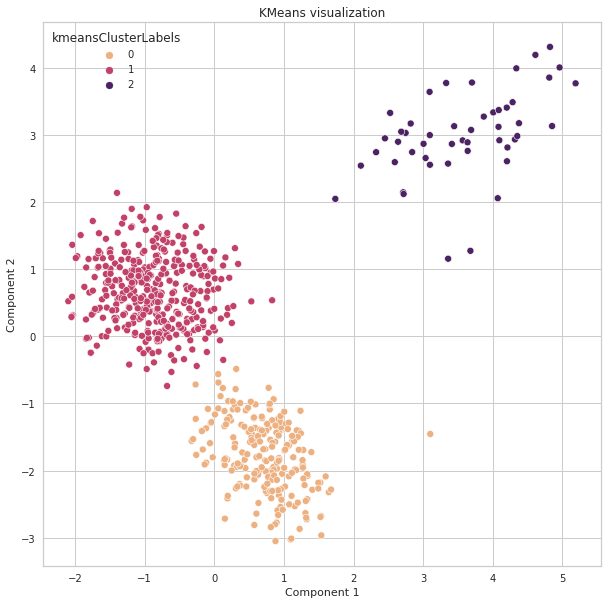

In [25]:
plt.figure(figsize=(10,10))
sns.scatterplot(kmeans_df['Component_2'],kmeans_df['Component_1'],hue= kmeans_df['kmeansClusterLabels'],palette='flare' )
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('KMeans visualization')

**Comparison of features across clusters**

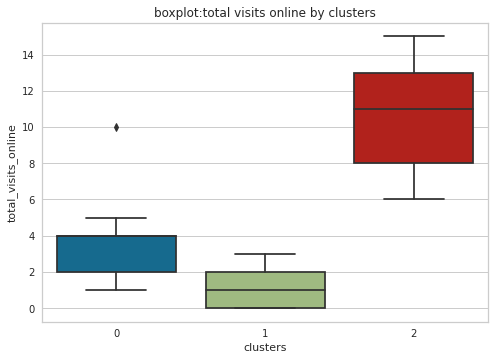

In [26]:
sns.boxplot( kmeans_df['kmeansClusterLabels'],kmeans_df['Total_visits_online'])
plt.xlabel('clusters')
plt.ylabel('total_visits_online')
plt.title('boxplot:total visits online by clusters')
plt.show()

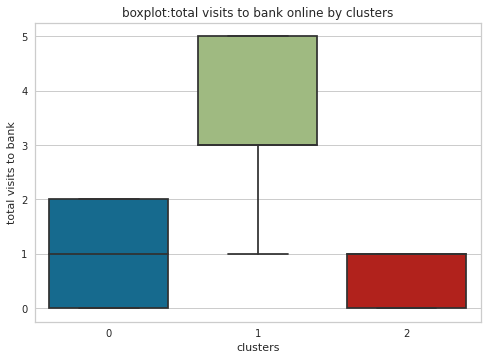

In [27]:
sns.boxplot( kmeans_df['kmeansClusterLabels'],kmeans_df['Total_visits_bank'])
plt.xlabel('clusters')
plt.ylabel('total visits to bank')
plt.title('boxplot:total visits to bank online by clusters')
plt.show()

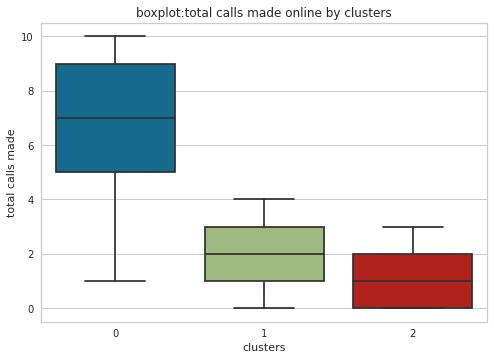

In [28]:
sns.boxplot( kmeans_df['kmeansClusterLabels'],kmeans_df['Total_calls_made'])
plt.xlabel('clusters')
plt.ylabel('total calls made')
plt.title('boxplot:total calls made online by clusters')
plt.show()

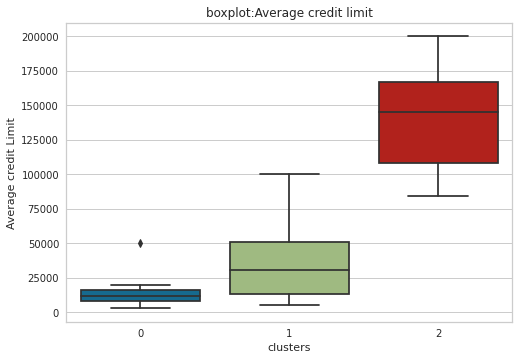

In [29]:
sns.boxplot( kmeans_df['kmeansClusterLabels'],kmeans_df['Avg_Credit_Limit'])
plt.xlabel('clusters')
plt.ylabel('Average credit Limit')
plt.title('boxplot:Average credit limit')
plt.show()

**END**